In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("data/advertising.csv")

print("✅ Dataset loaded successfully")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully
Shape: (200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
print("\n📊 Dataset Info:")
print(df.info())

print("\n📊 Dataset Statistics:")
print(df.describe())



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

📊 Dataset Statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


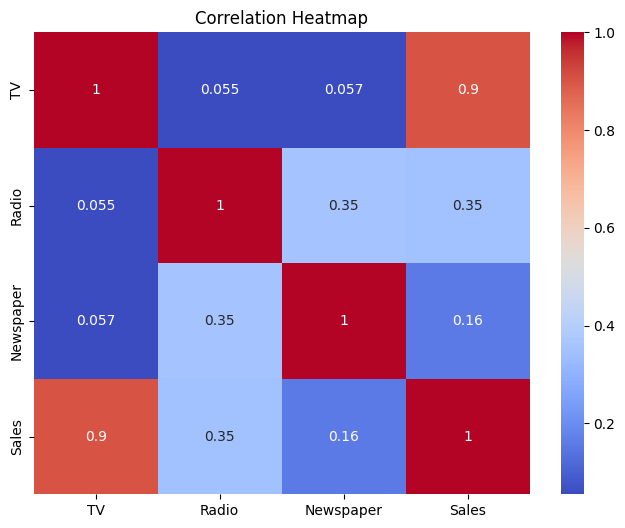

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


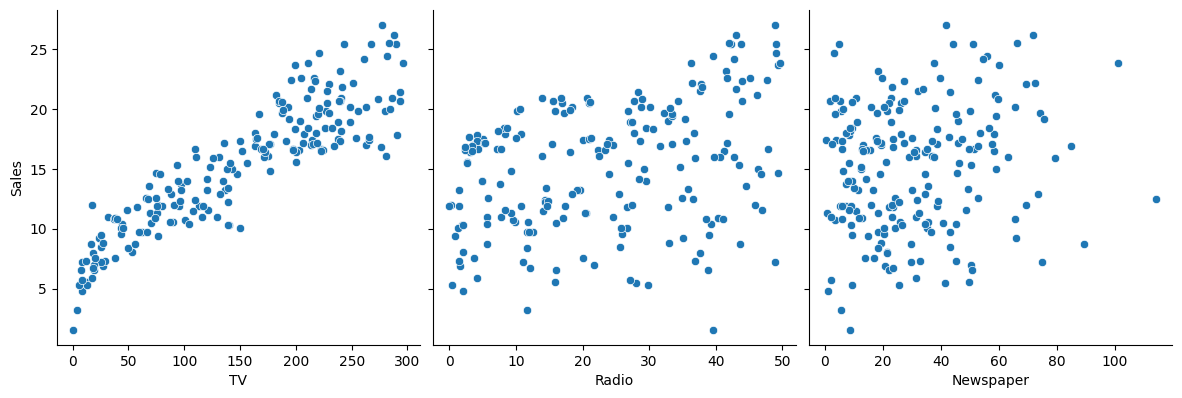

In [13]:
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", height=4, kind="scatter")
plt.show()


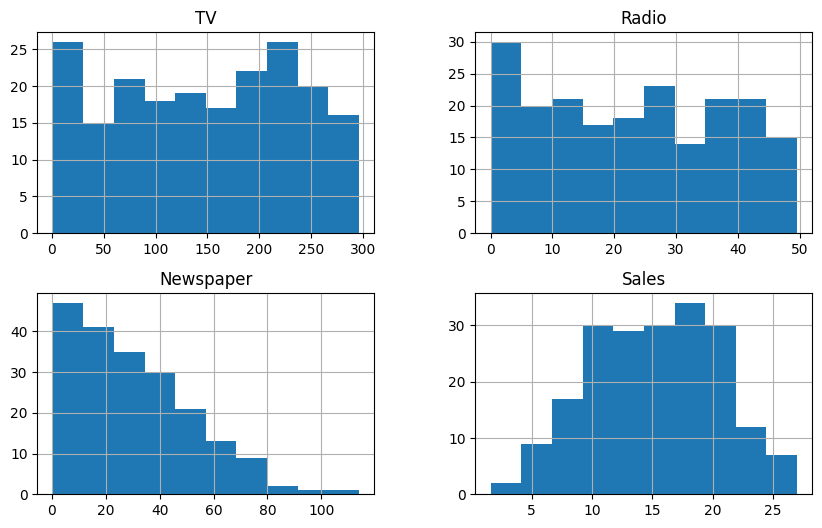

In [14]:
df.hist(figsize=(10,6))
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X = df.drop(columns=["Sales"])
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "RandomForest": RandomForestRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R²": r2, "RMSE": rmse}

results


{'LinearRegression': {'R²': 0.9059011844150826,
  'RMSE': np.float64(1.7052146229349223)},
 'Ridge': {'R²': 0.9058999159458062, 'RMSE': np.float64(1.7052261161989772)},
 'Lasso': {'R²': 0.9058505279101615, 'RMSE': np.float64(1.705673547896932)},
 'RandomForest': {'R²': 0.9534827934927883,
  'RMSE': np.float64(1.1989298770153327)}}

In [16]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importance = rf.feature_importances_
for col, val in zip(X.columns, importance):
    print(f"{col}: {val:.4f}")


TV: 0.8454
Radio: 0.1366
Newspaper: 0.0180


C:\Users\USER\AppData\Local\Temp\ipykernel_19848\2806308296.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R²"], palette="viridis")


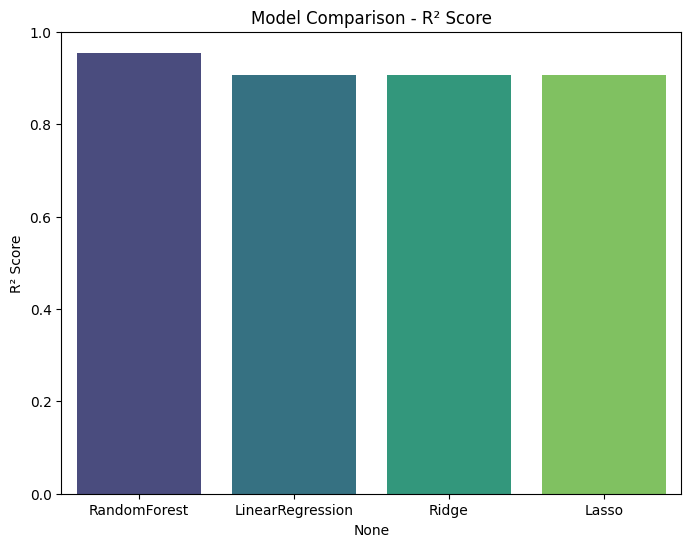

C:\Users\USER\AppData\Local\Temp\ipykernel_19848\2806308296.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["RMSE"], palette="magma")


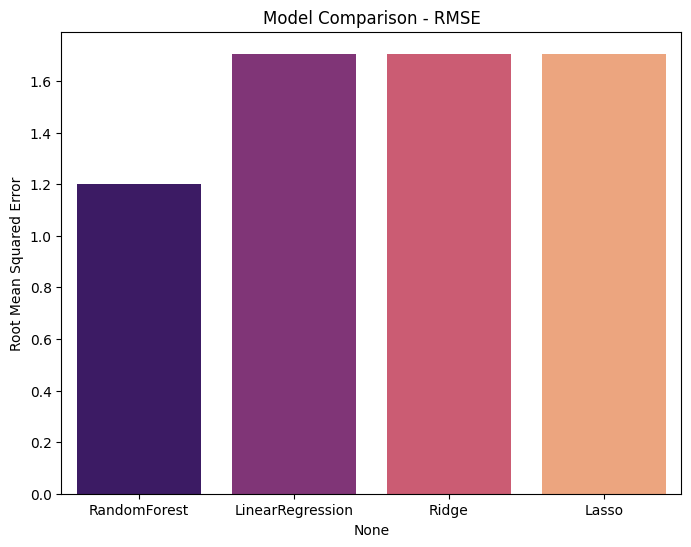

,R²,RMSE
RandomForest,0.953483,1.198930
LinearRegression,0.905901,1.705215
Ridge,0.905900,1.705226
Lasso,0.905851,1.705674


In [ ]:
import matplotlib.pyplot as plt


results_df = pd.DataFrame(results).T  
results_df = results_df.sort_values(by="R²", ascending=False)


plt.figure(figsize=(8,6))
sns.barplot(x=results_df.index, y=results_df["R²"], palette="viridis")
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.ylim(0,1)
plt.show()


plt.figure(figsize=(8,6))
sns.barplot(x=results_df.index, y=results_df["RMSE"], palette="magma")
plt.title("Model Comparison - RMSE")
plt.ylabel("Root Mean Squared Error")
plt.show()

results_df


In [ ]:

best_model = results_df["R²"].idxmax()
best_r2 = results_df.loc[best_model, "R²"]
best_rmse = results_df.loc[best_model, "RMSE"]

print(f"🏆 Best Model: {best_model}")
print(f"✅ R² Score: {best_r2:.4f}")
print(f"✅ RMSE: {best_rmse:.4f}")


🏆 Best Model: RandomForest
✅ R² Score: 0.9535
✅ RMSE: 1.1989


✅ Dataset Loaded


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

📊 Dataset Statistics:


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


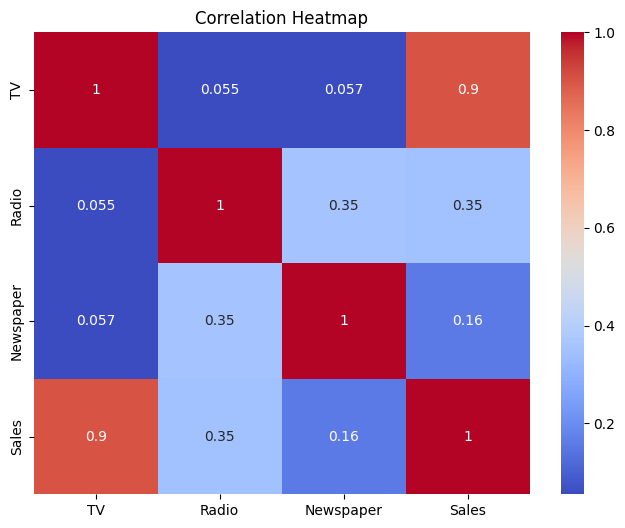

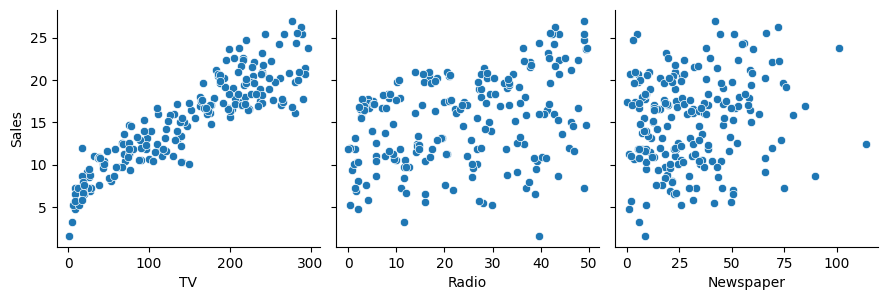

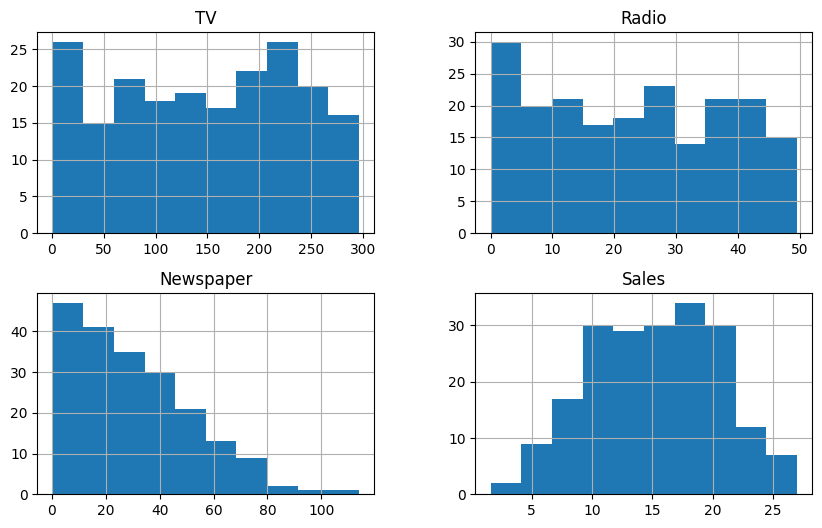


📊 Model Performance Summary:


,R²,RMSE
LinearRegression,0.905901,1.705215
Ridge,0.905900,1.705226
Lasso,0.905851,1.705674
RandomForest,0.953483,1.198930


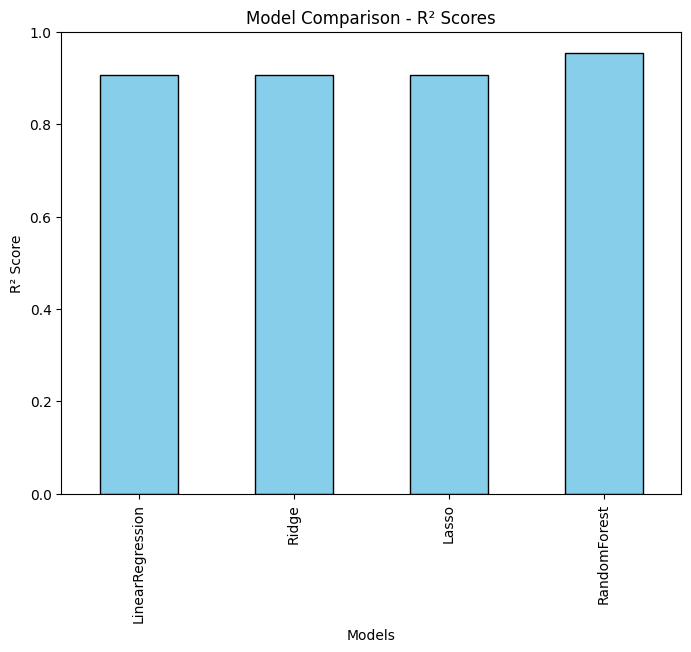

C:\Users\USER\AppData\Local\Temp\ipykernel_19848\4056673423.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=importance, palette="viridis")


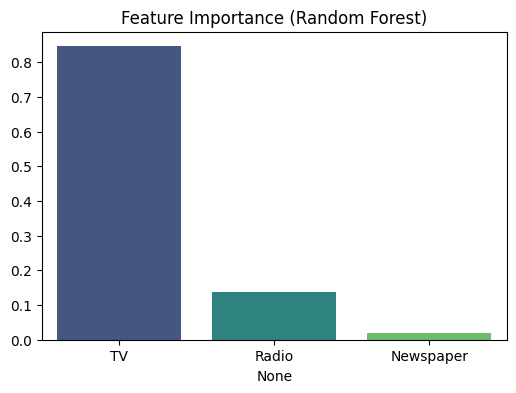

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

df = pd.read_csv("data/advertising.csv")

print("✅ Dataset Loaded")
display(df.head())

print("\n📊 Dataset Info:")
print(df.info())

print("\n📊 Dataset Statistics:")
display(df.describe())


plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


sns.pairplot(df, x_vars=["TV","Radio","Newspaper"], y_vars="Sales", height=3, kind="scatter")
plt.show()


df.hist(figsize=(10,6))
plt.show()


X = df.drop(columns=["Sales"])
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "RandomForest": RandomForestRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R²": r2, "RMSE": rmse}

results_df = pd.DataFrame(results).T
print("\n📊 Model Performance Summary:")
display(results_df)


plt.figure(figsize=(8,6))
results_df["R²"].plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Model Comparison - R² Scores")
plt.ylabel("R² Score")
plt.xlabel("Models")
plt.ylim(0,1)
plt.show()


rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importance = rf.feature_importances_
plt.figure(figsize=(6,4))
sns.barplot(x=X.columns, y=importance, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()
